<a href="https://colab.research.google.com/github/Dr-Mohamed-Elkholy/Machine-Learning-Projects/blob/main/Multilayer_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptrons
You should build an end-to-end machine learning pipeline using a multilayer perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) model.
- Optimize your pipeline by cross-validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

# Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
mnist_data = pd.read_csv('mnist.csv')
mnist_data = mnist_data.drop(columns=['id'])  # Assuming there's an 'id' column to drop

# Separate features and target variable
X = mnist_data.drop('class', axis=1) #/ 255.0  # Normalizing pixel values
y = mnist_data['class']


In [ ]:

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# pipeline with a scaler and MLP classifier
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # This step will be redundant since we already scaled the data
    ('mlp', MLPClassifier())  # Start with default hyperparameters
])

# Define a smaller parameter grid to reduce computation time
param_grid_reduced = {
    'mlp__hidden_layer_sizes': [(50,),(100,)],
    'mlp__activation': ['relu'],
    'mlp__solver': ['adam'],
    'mlp__learning_rate_init': [0.001, 0.01],
}

In [ ]:

# Initialize a new grid search with the reduced parameter grid
grid_search_reduced = GridSearchCV(mlp_pipeline, param_grid_reduced, n_jobs=-1, cv=3, verbose=2)

# Fit the grid search to the data
grid_search_reduced.fit(X_train, y_train)

# Use the best estimator to make predictions on the test set
best_mlp = grid_search_reduced.best_estimator_
y_pred = best_mlp.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Accuracy: 0.9325
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        90
           1       0.93      0.98      0.96        88
           2       0.91      0.94      0.93        72
           3       0.89      0.90      0.89        78
           4       0.91      0.95      0.93        77
           5       0.94      0.94      0.94        68
           6       0.94      0.92      0.93        73
           7       0.95      0.90      0.92        79
           8       0.92      0.90      0.91        92
           9       0.93      0.92      0.92        83

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



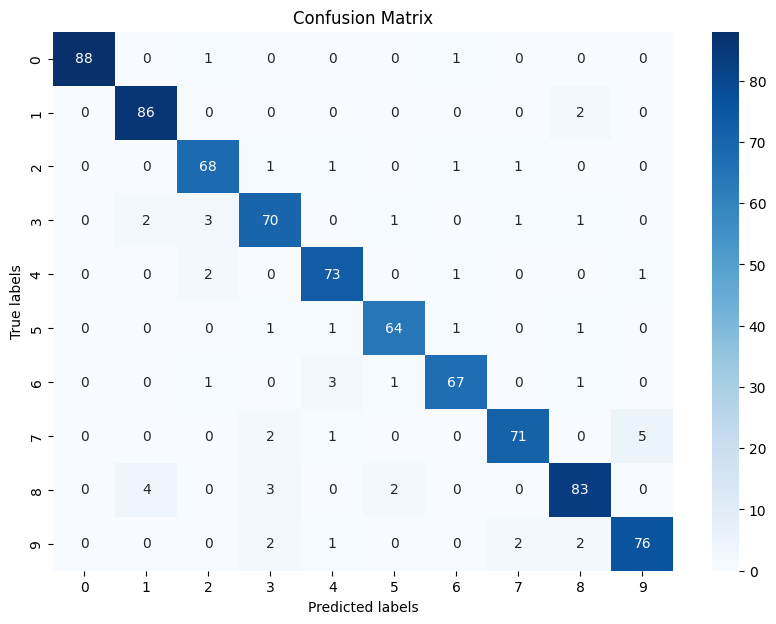

In [ ]:

# Generate and plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
